In [2]:
import pandas as pd
from holidays import UnitedStates
import seaborn as sns
import numpy as np

# Datasets Reading

In [2]:
taxi_df = pd.read_csv("dataset.csv", index_col=0)
# Create a new row for 2015-02-01 00:00:00
new_row = {'timestamp': pd.Timestamp('2015-02-01 00:00:00'), 'value': np.nan}

# Append the new row to the original DataFrame
taxi_df.loc[len(taxi_df)] = new_row
taxi_df

,timestamp,value
0,2014-07-01 00:00:00,10844.0
1,2014-07-01 00:30:00,8127.0
2,2014-07-01 01:00:00,6210.0
3,2014-07-01 01:30:00,4656.0
4,2014-07-01 02:00:00,3820.0
...,...,...
10316,2015-01-31 22:00:00,25721.0
10317,2015-01-31 22:30:00,27309.0
10318,2015-01-31 23:00:00,26591.0
10319,2015-01-31 23:30:00,26288.0


In [3]:
print(taxi_df.isnull().sum())
taxi_df.info()

timestamp    0
value        1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 10321 entries, 0 to 10320
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  10321 non-null  object 
 1   value      10320 non-null  float64
dtypes: float64(1), object(1)
memory usage: 241.9+ KB


In [4]:
weather_df = pd.read_csv('weather_csv.csv')
weather_df.head()

,timestamp,prep,snow,min_temp,max_temp
0,2014-07-01,0.00,0.0,0.0,72.0
1,2014-07-02,0.96,0.0,0.0,72.0
2,2014-07-03,1.78,0.0,0.0,69.0
3,2014-07-04,0.14,0.0,0.0,65.0
4,2014-07-05,0.00,0.0,0.0,63.0


In [5]:
print(weather_df.isnull().sum())
weather_df.info()

timestamp    0
prep         0
snow         0
min_temp     0
max_temp     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  216 non-null    object 
 1   prep       216 non-null    float64
 2   snow       216 non-null    float64
 3   min_temp   216 non-null    float64
 4   max_temp   216 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.6+ KB


In [6]:
# Create a holiday object for the US with state-specific holidays for New York
ny_holidays = UnitedStates(years=[2014, 2015], state='NY')

# Convert to a DataFrame
holidays_df = pd.DataFrame({
    "Date": list(ny_holidays.keys()),
    "Holiday": list(ny_holidays.values())
})

# Convert 'Date' to datetime
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

# Filter holidays up to '2015-01-31'
holidays_df = holidays_df.loc[(holidays_df['Date'] <= '2015-01-31') & (holidays_df['Date'] >= '2014-07-01')]

# Sort by index and rename the column "Date" to "timestamp"
holidays_df = holidays_df.sort_values(by=['Date'])

# Show the final DataFrame
holidays_df

,Date,Holiday
2,2014-07-04,Independence Day
3,2014-09-01,Labor Day
9,2014-10-13,Columbus Day
12,2014-11-04,Election Day
4,2014-11-11,Veterans Day
5,2014-11-27,Thanksgiving
6,2014-12-25,Christmas Day
13,2015-01-01,New Year's Day
21,2015-01-19,Martin Luther King Jr. Day


In [7]:
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'])
taxi_df['year'] = taxi_df['timestamp'].dt.year
taxi_df['month'] = taxi_df['timestamp'].dt.month
taxi_df['day'] = taxi_df['timestamp'].dt.day
taxi_df['Date'] = taxi_df['timestamp'].dt.date
taxi_df['Date'] = taxi_df['Date'].apply(pd.to_datetime).dt.date
taxi_df['day_of_week'] = taxi_df['timestamp'].dt.day_of_week + 1
taxi_df['hour'] = taxi_df['timestamp'].dt.hour
taxi_df['isWeekend'] = taxi_df.day_of_week.map({1: False, 2: False, 3: False, 4: False, 5: False, 6: True, 7: True})

# Add time parts to the anomaly dates and update the 'isAnomaly' column
taxi_df['isAnomaly'] = False
anomaly_dates = ['2014-11-02', '2014-11-27', '2014-12-24', '2014-12-25', '2015-01-01', '2015-01-26', '2015-01-27']

anomaly_dates = [pd.to_datetime(date).date() for date in anomaly_dates]
taxi_df['isAnomaly'] = taxi_df['Date'].isin(anomaly_dates)

# View the dataset for verification
taxi_df.loc[taxi_df['isAnomaly']][['Date', 'isAnomaly']]

,Date,isAnomaly
5952,2014-11-02,True
5953,2014-11-02,True
5954,2014-11-02,True
5955,2014-11-02,True
5956,2014-11-02,True
...,...,...
10123,2015-01-27,True
10124,2015-01-27,True
10125,2015-01-27,True
10126,2015-01-27,True


In [8]:
taxi_df

,timestamp,value,year,month,day,Date,day_of_week,hour,isWeekend,isAnomaly
0,2014-07-01 00:00:00,10844.0,2014,7,1,2014-07-01,2,0,False,False
1,2014-07-01 00:30:00,8127.0,2014,7,1,2014-07-01,2,0,False,False
2,2014-07-01 01:00:00,6210.0,2014,7,1,2014-07-01,2,1,False,False
3,2014-07-01 01:30:00,4656.0,2014,7,1,2014-07-01,2,1,False,False
4,2014-07-01 02:00:00,3820.0,2014,7,1,2014-07-01,2,2,False,False
...,...,...,...,...,...,...,...,...,...,...
10316,2015-01-31 22:00:00,25721.0,2015,1,31,2015-01-31,6,22,True,False
10317,2015-01-31 22:30:00,27309.0,2015,1,31,2015-01-31,6,22,True,False
10318,2015-01-31 23:00:00,26591.0,2015,1,31,2015-01-31,6,23,True,False
10319,2015-01-31 23:30:00,26288.0,2015,1,31,2015-01-31,6,23,True,False


Merging datasets

In [9]:
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])
taxi_df['Date'] = pd.to_datetime(taxi_df['Date'])
merged_data = pd.merge(taxi_df, holidays_df, how='left', on='Date')

weather_df['timestamp'] = weather_df['timestamp'] + ' 00:00:00'
weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'] + ' 00:00:00')
weather_df['timestamp'] = weather_df['timestamp'].dt.normalize()
weather_df
merged_data = pd.merge(merged_data, weather_df, how='left', on='timestamp')
merged_data.loc[~merged_data['Holiday'].isnull()]

C:\Users\weare\AppData\Local\Temp\ipykernel_22760\2614963403.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'] + ' 00:00:00')


,timestamp,value,year,month,day,Date,day_of_week,hour,isWeekend,isAnomaly,Holiday,prep,snow,min_temp,max_temp
144,2014-07-04 00:00:00,15591.0,2014,7,4,2014-07-04,5,0,False,False,Independence Day,0.14,0.0,0.0,65.0
145,2014-07-04 00:30:00,14395.0,2014,7,4,2014-07-04,5,0,False,False,Independence Day,NaN,NaN,NaN,NaN
146,2014-07-04 01:00:00,12535.0,2014,7,4,2014-07-04,5,1,False,False,Independence Day,NaN,NaN,NaN,NaN
147,2014-07-04 01:30:00,11341.0,2014,7,4,2014-07-04,5,1,False,False,Independence Day,NaN,NaN,NaN,NaN
148,2014-07-04 02:00:00,9980.0,2014,7,4,2014-07-04,5,2,False,False,Independence Day,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,2015-01-19 21:30:00,14069.0,2015,1,19,2015-01-19,1,21,False,False,Martin Luther King Jr. Day,NaN,NaN,NaN,NaN
9740,2015-01-19 22:00:00,13506.0,2015,1,19,2015-01-19,1,22,False,False,Martin Luther King Jr. Day,NaN,NaN,NaN,NaN
9741,2015-01-19 22:30:00,12936.0,2015,1,19,2015-01-19,1,22,False,False,Martin Luther King Jr. Day,NaN,NaN,NaN,NaN
9742,2015-01-19 23:00:00,10400.0,2015,1,19,2015-01-19,1,23,False,False,Martin Luther King Jr. Day,NaN,NaN,NaN,NaN


In [10]:
dataset = merged_data.copy()
dataset

,timestamp,value,year,month,day,Date,day_of_week,hour,isWeekend,isAnomaly,Holiday,prep,snow,min_temp,max_temp
0,2014-07-01 00:00:00,10844.0,2014,7,1,2014-07-01,2,0,False,False,NaN,0.00,0.0,0.0,72.0
1,2014-07-01 00:30:00,8127.0,2014,7,1,2014-07-01,2,0,False,False,NaN,NaN,NaN,NaN,NaN
2,2014-07-01 01:00:00,6210.0,2014,7,1,2014-07-01,2,1,False,False,NaN,NaN,NaN,NaN,NaN
3,2014-07-01 01:30:00,4656.0,2014,7,1,2014-07-01,2,1,False,False,NaN,NaN,NaN,NaN,NaN
4,2014-07-01 02:00:00,3820.0,2014,7,1,2014-07-01,2,2,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,2015-01-31 22:00:00,25721.0,2015,1,31,2015-01-31,6,22,True,False,NaN,NaN,NaN,NaN,NaN
10317,2015-01-31 22:30:00,27309.0,2015,1,31,2015-01-31,6,22,True,False,NaN,NaN,NaN,NaN,NaN
10318,2015-01-31 23:00:00,26591.0,2015,1,31,2015-01-31,6,23,True,False,NaN,NaN,NaN,NaN,NaN
10319,2015-01-31 23:30:00,26288.0,2015,1,31,2015-01-31,6,23,True,False,NaN,NaN,NaN,NaN,NaN


Filling the missing values

In [11]:
dataset = dataset[['timestamp','value','month','day','day_of_week','isWeekend','isAnomaly','Holiday','prep','snow','min_temp','max_temp']]
dataset['isHoliday'] = False
dataset.loc[~dataset['Holiday'].isnull(),'isHoliday'] = True
dataset

C:\Users\weare\AppData\Local\Temp\ipykernel_22760\2780636988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['isHoliday'] = False


,timestamp,value,month,day,day_of_week,isWeekend,isAnomaly,Holiday,prep,snow,min_temp,max_temp,isHoliday
0,2014-07-01 00:00:00,10844.0,7,1,2,False,False,NaN,0.00,0.0,0.0,72.0,False
1,2014-07-01 00:30:00,8127.0,7,1,2,False,False,NaN,NaN,NaN,NaN,NaN,False
2,2014-07-01 01:00:00,6210.0,7,1,2,False,False,NaN,NaN,NaN,NaN,NaN,False
3,2014-07-01 01:30:00,4656.0,7,1,2,False,False,NaN,NaN,NaN,NaN,NaN,False
4,2014-07-01 02:00:00,3820.0,7,1,2,False,False,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,2015-01-31 22:00:00,25721.0,1,31,6,True,False,NaN,NaN,NaN,NaN,NaN,False
10317,2015-01-31 22:30:00,27309.0,1,31,6,True,False,NaN,NaN,NaN,NaN,NaN,False
10318,2015-01-31 23:00:00,26591.0,1,31,6,True,False,NaN,NaN,NaN,NaN,NaN,False
10319,2015-01-31 23:30:00,26288.0,1,31,6,True,False,NaN,NaN,NaN,NaN,NaN,False


In [12]:
# Save the merged_data DataFrame to a CSV file
dataset.to_csv('updated_dataset.csv', index=False)

# Data Analysis

<Axes: >

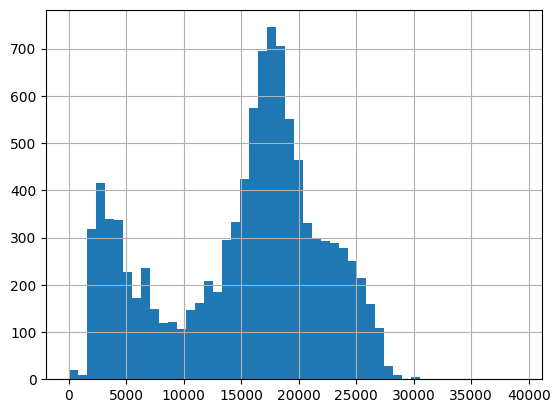

In [13]:
taxi_df['value'].hist(bins=50)


<Axes: xlabel='value'>

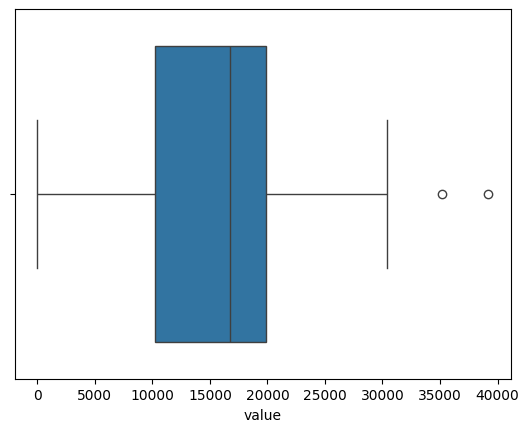

In [14]:
sns.boxplot(x=taxi_df['value'])

timestamp          0
value              1
month              0
day                0
day_of_week        0
isWeekend          0
isAnomaly          0
Holiday         9889
prep           10105
snow           10105
min_temp       10105
max_temp       10105
isHoliday          0
dtype: int64


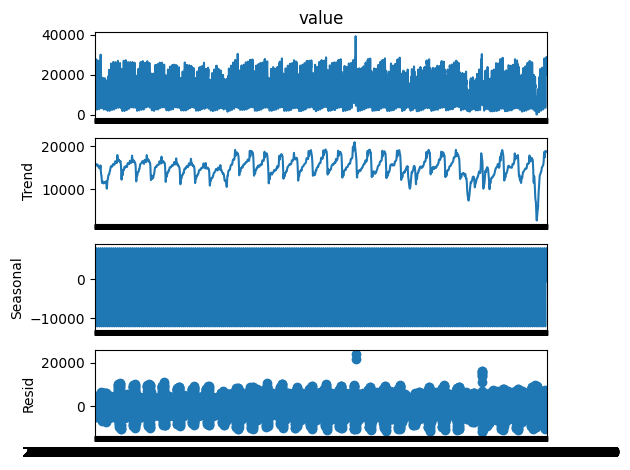

In [ ]:
import matplotlib.pyplot as plt
dataset = pd.read_csv("updated_dataset.csv")

# print(dataset.describe())
print(dataset.isnull().sum())
dataset['prep'].fillna(0, inplace=True)
dataset['snow'].fillna(0, inplace=True)
dataset['value'].fillna(method='ffill', inplace=True)
dataset['min_temp'].fillna(method='ffill', inplace=True)
dataset['max_temp'].fillna(method='ffill', inplace=True)

In [ ]:
correlation_matrix = dataset[['value', 'prep', 'snow', 'min_temp', 'max_temp']].corr()
print(correlation_matrix)

             value      prep      snow  min_temp  max_temp
value     1.000000 -0.001641 -0.015130 -0.041866  0.002282
prep     -0.001641  1.000000  0.154568 -0.000087 -0.001713
snow     -0.015130  0.154568  1.000000  0.064868 -0.033446
min_temp -0.041866 -0.000087  0.064868  1.000000 -0.349874
max_temp  0.002282 -0.001713 -0.033446 -0.349874  1.000000


In [32]:
from scipy.stats import shapiro

# Apply Shapiro-Wilk test on the 'value' column
stat, p_value = shapiro(dataset['value'].dropna())  # Drop missing values

print(f"Shapiro-Wilk Test Stat: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Data seems to be normally distributed.")
else:
    print("Data does not follow a normal distribution.")


Shapiro-Wilk Test Stat: 0.940794050693512, p-value: 0.0
Data does not follow a normal distribution.


c:\Users\aqils\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


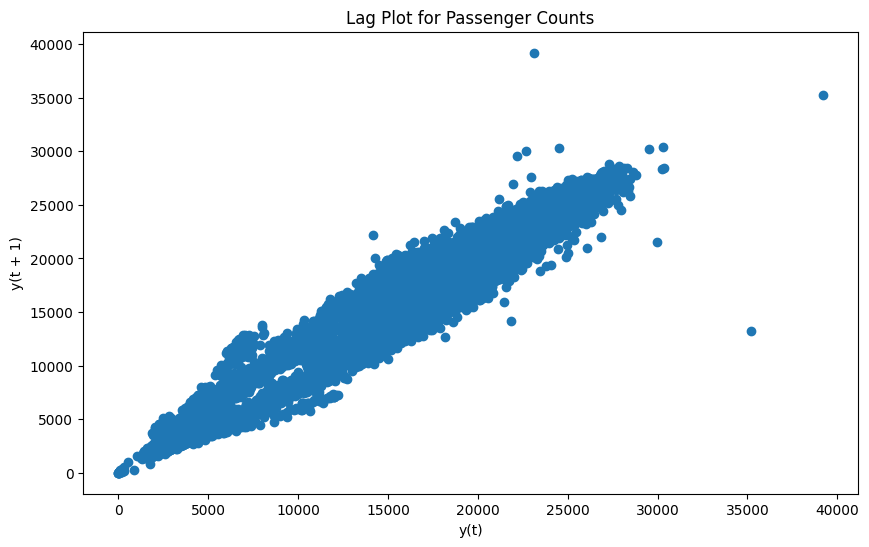

In [33]:
from pandas.plotting import lag_plot

# Create lag plot for passenger values
plt.figure(figsize=(10, 6))
lag_plot(dataset['value'].dropna())
plt.title('Lag Plot for Passenger Counts')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller

# Apply ADF test
adf_stat, p_value, _, _, critical_values, _ = adfuller(dataset['value'].dropna())

print(f"ADF Test Stat: {adf_stat}")
print(f"p-value: {p_value}")
print(f"Critical Values: {critical_values}")

if p_value < 0.05:
    print("Data is stationary.")
else:
    print("Data is non-stationary.")


ADF Test Stat: -10.743545098985278
p-value: 2.778649530869189e-19
Critical Values: {'1%': -3.430986215686417, '5%': -2.8618211703342533, '10%': -2.5669196618249632}
Data is stationary.


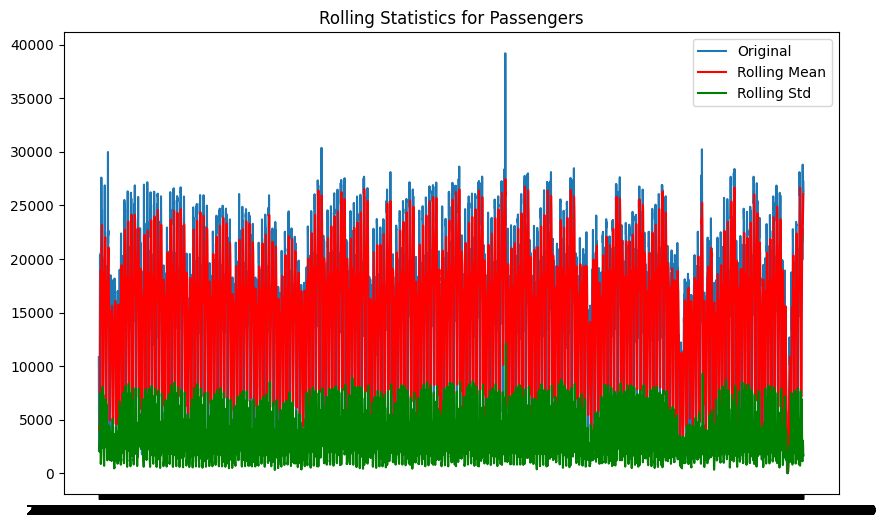

In [ ]:
# Calculate rolling mean and standard deviation
rolling_mean = dataset['value'].rolling(window=12).mean()
rolling_std = dataset['value'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(dataset['value'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Statistics for Passengers')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'Independence Day'